# BLM example

In [1]:
# Add PyTwoWay to system path (SET THESE TO WHERE YOU HAVE THE PACKAGE REPOSITORIES CLONED)
import sys
sys.path.append('../../..')

In [2]:
# Import the PyTwoWay package 
# (Make sure you have installed it using pip install pytwoway)
import numpy as np
import bipartitepandas as bpd
import pytwoway as tw
from matplotlib import pyplot as plt

## First, check out parameter options

In [3]:
print('----- BLM -----')
tw.blm_params().describe_all()
print('----- Clustering -----')
bpd.cluster_params().describe_all()
print('----- Cleaning -----')
bpd.clean_params().describe_all()
print('----- Simulation -----')
bpd.sim_params().describe_all()

----- BLM -----
KEY: 'nl'
CURRENT VALUE: 6
VALID VALUES: one of type <class 'int'>
CONSTRAINTS: '>= 1'
DESCRIPTION: 
            (default=6) Number of worker types.
        
KEY: 'nk'
CURRENT VALUE: 10
VALID VALUES: one of type <class 'int'>
CONSTRAINTS: '>= 1'
DESCRIPTION: 
            (default=10) Number of firm types.
        
KEY: 'categorical_time_varying_worker_interaction_dict'
CURRENT VALUE: None
VALID VALUES: None or dictionary of type <class 'bipartitepandas.util.ParamsDict'>
DESCRIPTION: 
            (default=None) Dictionary linking column names to instances of tw.sim_categorical_time_varying_worker_interaction_params(). Each instance specifies a new control variable where the effect interacts with worker types and can vary between the first and second periods. Run tw.sim_categorical_time_varying_worker_interaction_params().describe_all() for descriptions of all valid parameters. None is equivalent to {}.
        
KEY: 'categorical_time_nonvarying_worker_interaction_dict'
C

## Second, set parameter choices

In [4]:
nl = 2 # Number of worker types
nk = 3 # Number of firm types
blm_params = tw.blm_params({
    'nl': nl,
    'nk': nk
})
cluster_params = bpd.cluster_params({
    'measures': bpd.measures.CDFs(),
    'grouping': bpd.grouping.KMeans(n_clusters=nk),
    'is_sorted': True,
    'copy': False
})
clean_params = bpd.clean_params({
    'drop_returns': 'returners',
    'copy': False
})
sim_params = bpd.sim_params({
    'nl': nl,
    'nk': nk,
    'c_sort': 0,
    'c_netw': 0,
    'c_sig': 1
})

## Simulate data

Simulate a bipartite network using BipartitePandas. We use this here to demonstrate how to fit the estimator using real data.

Note that `l` gives the true worker type and `k` gives the true firm type, while `alpha` gives the true worker effect and `psi` gives the true firm effect.

The BLM estimator uses the firm types computed via clustering, which are saved in columns `g1` and `g2`.

In [5]:
sim_data = bpd.BipartiteDataFrame(bpd.SimBipartite(sim_params).simulate()[['i', 'j', 'y', 't', 'l', 'alpha', 'k', 'psi']]).clean(clean_params).cluster(cluster_params).collapse(is_sorted=True, copy=False).to_eventstudy(is_sorted=True, copy=False)
print('Movers data')
display(sim_data[sim_data['m'] > 0])
print('Stayers data')
display(sim_data[sim_data['m'] == 0])

checking required columns and datatypes
sorting rows
dropping NaN observations
generating 'm' column
keeping highest paying job for i-t (worker-year) duplicates (how='max')
dropping workers who leave a firm then return to it (how='returners')
making 'i' ids contiguous
making 'j' ids contiguous
computing largest connected set (how=None)
sorting columns
resetting index
Movers data


,i,j1,j2,y1,y2,t11,t12,t21,t22,g1,...,w2,m,alpha1,alpha2,k1,k2,l1,l2,psi1,psi2
0,0,103,94,-0.771118,1.255665,0,0,1,1,2,...,1,1,0.430727,0.430727,1.0,1.0,1.0,1.0,0.00000,0.00000
1,0,94,166,1.255665,1.174992,1,1,2,3,2,...,2,1,0.430727,0.430727,1.0,2.0,1.0,1.0,0.00000,0.67449
2,0,166,28,1.174992,0.590593,2,3,4,4,0,...,1,1,0.430727,0.430727,2.0,0.0,1.0,1.0,0.67449,-0.67449
3,1,157,1,-0.197483,-1.159660,0,0,1,1,0,...,1,1,-0.430727,-0.430727,2.0,0.0,0.0,0.0,0.67449,-0.67449
4,1,1,127,-1.159660,0.506943,1,1,2,2,1,...,1,1,-0.430727,-0.430727,0.0,1.0,0.0,0.0,-0.67449,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20319,9924,143,179,1.340913,0.754973,0,0,1,2,0,...,2,1,0.430727,0.430727,2.0,2.0,1.0,1.0,0.67449,0.67449
20320,9924,179,135,0.754973,0.578152,1,2,3,4,0,...,2,1,0.430727,0.430727,2.0,1.0,1.0,1.0,0.67449,0.00000
20321,9925,186,177,0.079989,1.339144,0,3,4,4,0,...,1,1,-0.430727,-0.430727,2.0,2.0,0.0,0.0,0.67449,0.67449
20322,9926,121,126,-0.287620,0.065049,0,2,3,3,2,...,1,1,0.430727,0.430727,1.0,1.0,1.0,1.0,0.00000,0.00000


Stayers data


,i,j1,j2,y1,y2,t11,t12,t21,t22,g1,...,w2,m,alpha1,alpha2,k1,k2,l1,l2,psi1,psi2
20,8,121,121,-0.628348,-0.628348,0,4,0,4,2,...,5,0,-0.430727,-0.430727,1.0,1.0,0.0,0.0,0.00000,0.00000
51,22,166,166,0.205239,0.205239,0,4,0,4,0,...,5,0,-0.430727,-0.430727,2.0,2.0,0.0,0.0,0.67449,0.67449
86,41,102,102,0.023124,0.023124,0,4,0,4,2,...,5,0,0.430727,0.430727,1.0,1.0,1.0,1.0,0.00000,0.00000
91,43,83,83,-0.219225,-0.219225,0,4,0,4,2,...,5,0,-0.430727,-0.430727,1.0,1.0,0.0,0.0,0.00000,0.00000
130,62,89,89,-0.679259,-0.679259,0,4,0,4,2,...,5,0,0.430727,0.430727,1.0,1.0,1.0,1.0,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20191,9864,184,184,-0.060055,-0.060055,0,4,0,4,0,...,5,0,-0.430727,-0.430727,2.0,2.0,0.0,0.0,0.67449,0.67449
20244,9886,26,26,0.185901,0.185901,0,4,0,4,1,...,5,0,0.430727,0.430727,0.0,0.0,1.0,1.0,-0.67449,-0.67449
20249,9889,128,128,-0.071153,-0.071153,0,4,0,4,2,...,5,0,0.430727,0.430727,1.0,1.0,1.0,1.0,0.00000,0.00000
20270,9899,125,125,0.261912,0.261912,0,4,0,4,2,...,5,0,0.430727,0.430727,1.0,1.0,1.0,1.0,0.00000,0.00000


## Initialize and run BLMEstimator

<div class="alert alert-info">

Note

The `BLMEstimator` class requires data to be formatted as a BipartitePandas DataFrame.

</div>

In [6]:
# Initialize BLM estimator
blm_fit = tw.BLMEstimator(blm_params)
# Fit BLM estimator
blm_fit.fit(jdata=sim_data[sim_data['m'] > 0], sdata=sim_data[sim_data['m'] == 0], n_init=40, n_best=5, ncore=4)
# Sort estimated parameters (DO NOT do this with real data as it will prevent proper merging back into the original dataset)
blm_fit.model._sort_matrices()

100%|███████████████████████████████████████████| 40/40 [00:38<00:00,  1.04it/s]


## Check that log-likelihoods are monotonic

Log-likelihoods monotonic (movers): True


Text(0, 0.5, 'Change in log-likelihood')

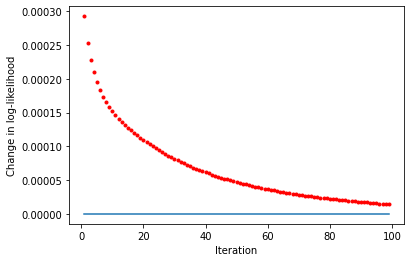

In [7]:
liks1 = blm_fit.model.liks1

print('Log-likelihoods monotonic (movers):', np.min(np.diff(liks1)) >= 0)

x_axis = range(1, len(liks1))
plt.plot(x_axis, np.diff(liks1), '.', label='liks1', color='red')
plt.plot(x_axis, np.zeros(len(liks1) - 1))
plt.xlabel('Iteration')
plt.ylabel('Change in log-likelihood')

Log-likelihoods monotonic (stayers): True


Text(0, 0.5, 'Change in log-likelihood')

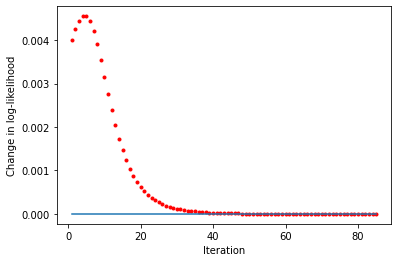

In [8]:
liks0 = blm_fit.model.liks0

print('Log-likelihoods monotonic (stayers):', np.min(np.diff(liks0)) >= 0)

x_axis = range(1, len(liks0))
plt.plot(x_axis, np.diff(liks0), '.', label='liks0', color='red')
plt.plot(x_axis, np.zeros(len(liks0) - 1))
plt.xlabel('Iteration')
plt.ylabel('Change in log-likelihood')

## Now we can investigate the results

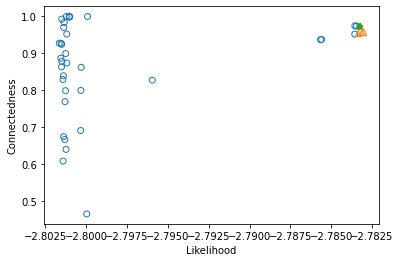

In [9]:
# Plot likelihood vs. connectedness
blm_fit.plot_liks_connectedness()

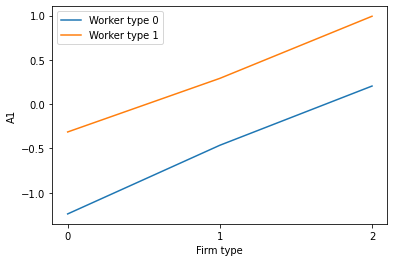

In [10]:
blm_fit.plot_A1()

## Finally, we can compare estimates to the truth

In [11]:
# Compute true parameters
true_A1 = np.expand_dims(sim_data.groupby('l1')['alpha1'].mean().to_numpy(), 1) + np.tile(sim_data.groupby('k1')['psi1'].mean().to_numpy(), (nl, 1))
true_A2 = np.expand_dims(sim_data.groupby('l2')['alpha2'].mean().to_numpy(), 1) + np.tile(sim_data.groupby('k2')['psi2'].mean().to_numpy(), (nl, 1))

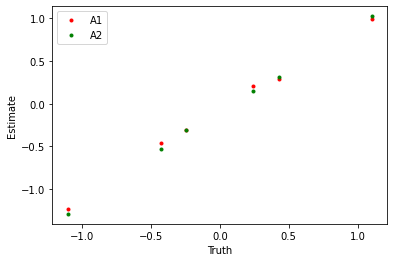

In [12]:
plt.plot(true_A1.flatten(), blm_fit.model.A1.flatten(), '.', label='A1', color='red')
plt.plot(true_A2.flatten(), blm_fit.model.A2.flatten(), '.', label='A2', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()

# Control variables

## Simulate some data

The package contains functions to simulate data from the BLM dgp. We use this here to see how to use control variables.

## Set parameter choices

PyTwoWay allows for the following types of control variables:

- Categorical/continuous
- Time-varying/non-time-varying
- Worker-interaction/non-worker-interaction

For categorical variables, the number of types must be specified.

Time-varying means that the parameter estimate can differ in the first and second periods. Conversely, non-time-varying means that the parameter is the same in the first and second periods.

Worker-interaction means that the parameter interacts with the unobserved worker type. Conversely, non-worker-interaction means that the parameter is the same for all worker types.

In this example, we simulate a categorical, time-varying control variable. We use a low variance to ensure stability of the estimator.

---
---

The available control type parameter dictionaries are as follows:

- `tw.categorical_time_varying_worker_interaction_params`
- `tw.categorical_time_nonvarying_worker_interaction_params`
- `tw.categorical_time_varying_params`
- `tw.categorical_time_nonvarying_params`
- `tw.continuous_time_varying_worker_interaction_params`
- `tw.continuous_time_nonvarying_worker_interaction_params`
- `tw.continuous_time_varying_params`
- `tw.continuous_time_nonvarying_params`

To use a given control type, use the dictionary name as the key, where the term `params` is replaced by the term `dict`, in the `tw.blm_params` parameter dictionary. This key should be linked to a dictionary linking column names to instances of the chosen control type parameter dictionary.

In [13]:
n_control = 2 # Number of types for control variable

cat_tv_params = tw.categorical_time_varying_params({
    'n': n_control,
    'a1_mu': 0.5, 'a1_sig': 2.5, 'a2_mu': 2, 'a2_sig': 0.25,
    's1_low': 0, 's1_high': 0.01, 's2_low': 0, 's2_high': 0.01
})
blm_sim_params = tw.sim_params({
    'nl': nl,
    'nk': nk,
    'a1_mu': -2, 'a1_sig': 0.25, 'a2_mu': 2, 'a2_sig': 0.25,
    's1_low': 0, 's1_high': 0.01, 's2_low': 0, 's2_high': 0.01,
    'categorical_time_varying_dict': {'cat_tv_control': cat_tv_params}
})
blm_params = tw.blm_params({
    'nl': nl,
    'nk': nk,
    'a1_mu': -2, 'a1_sig': 0.25, 'a2_mu': 2, 'a2_sig': 0.25,
    's1_low': 0, 's1_high': 0.01, 's2_low': 0, 's2_high': 0.01,
    'categorical_time_varying_dict': {'cat_tv_control': cat_tv_params}
})

## Simulate data

`sim_data` gives a dictionary where the key `'jdata'` gives simulatedmover data and the key `'sdata'` gives simulated stayer data.

`sim_params` gives a dictionary that links each type of control variable to the simulated parameter values for that type.

In [14]:
blm_true = tw.SimBLM(blm_sim_params)
sim_data, sim_params = blm_true.simulate(return_parameters=True)
sim_data['jdata'] = bpd.BipartiteDataFrame(i=np.arange(len(sim_data['jdata'])), **sim_data['jdata'])
sim_data['sdata'] = bpd.BipartiteDataFrame(i=len(sim_data['jdata']) + np.arange(len(sim_data['sdata'])), **sim_data['sdata'])

In [15]:
print('Movers data')
display(sim_data['jdata'])
print('Stayers data')
display(sim_data['sdata'])
print('Simulated parameter values')
display(sim_params)

Movers data


,i,j1,j2,y1,y2,g1,g2,cat_tv_control1,cat_tv_control2,l
0,0,1,0,0.741990,3.920326,0,0,1,0,1
1,1,0,1,-3.705281,4.218631,0,0,0,1,1
2,2,0,1,0.743833,4.237779,0,0,1,1,1
3,3,1,0,-3.705047,4.237536,0,0,0,1,1
4,4,1,0,-3.701134,3.933456,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
85,85,5,4,-3.005151,4.632365,2,2,0,1,1
86,86,5,4,1.447136,4.632079,2,2,1,1,1
87,87,4,5,0.547320,4.320890,2,2,1,1,0
88,88,4,5,1.439396,4.339011,2,2,1,0,1


Stayers data


,i,j1,j2,y1,y2,g1,g2,cat_tv_control1,cat_tv_control2,l
0,90,1,1,0.670972,3.617971,0,0,1,0,0
1,91,1,1,-3.711411,4.226814,0,0,0,1,1
2,92,1,1,0.747992,3.928921,0,0,1,0,1
3,93,0,0,0.658675,3.604418,0,0,1,0,0
4,94,0,0,-3.777613,3.904954,0,0,0,1,0
5,95,0,0,0.657570,3.602138,0,0,1,0,0
6,96,1,1,0.655241,3.611374,0,0,1,0,0
7,97,0,0,-3.778593,3.605257,0,0,0,0,0
8,98,0,0,0.659101,3.907105,0,0,1,1,0
9,99,1,1,0.745373,3.935042,0,0,1,0,1


Simulated parameter values


{'A1': array([[-2.19331961, -1.94072547, -2.31433949],
        [-2.10936837, -2.11875244, -1.40952717]]),
 'A2': array([[1.55615086, 1.84734543, 1.97277768],
        [1.8773534 , 1.91093955, 2.28283161]]),
 'S1': array([[0.00675571, 0.00869993, 0.00563915],
        [0.00206365, 0.00393117, 0.00664586]]),
 'S2': array([[0.00410339, 0.00351152, 0.00286124],
        [0.00587553, 0.00270617, 0.00052562]]),
 'pk1': array([[0.06939058, 0.93060942],
        [0.15818479, 0.84181521],
        [0.86384832, 0.13615168],
        [0.97782941, 0.02217059],
        [0.75239273, 0.24760727],
        [0.03471336, 0.96528664],
        [0.1284783 , 0.8715217 ],
        [0.30437529, 0.69562471],
        [0.24641518, 0.75358482]]),
 'pk0': array([[0.5690977 , 0.4309023 ],
        [0.51033769, 0.48966231],
        [0.80483313, 0.19516687]]),
 'A1_cat_wi': {},
 'A2_cat_wi': {},
 'A_cat_wi': {},
 'S1_cat_wi': {},
 'S2_cat_wi': {},
 'S_cat_wi': {},
 'A1_cat': {'cat_tv_control': array([-1.59821121,  2.85448077]

## Initialize and run BLMEstimator

In [16]:
# Initialize BLM estimator
blm_fit = tw.BLMEstimator(blm_params)
# Fit BLM estimator
blm_fit.fit(jdata=sim_data['jdata'], sdata=sim_data['sdata'], n_init=80, n_best=5, ncore=4)
# Sort estimated parameters (DO NOT do this with real data as it will prevent proper merging back into the original dataset)
blm_fit.model._sort_matrices()

100%|███████████████████████████████████████████| 80/80 [00:16<00:00,  4.99it/s]


## Check that log-likelihoods are monotonic

Log-likelihoods monotonic (movers): True


Text(0, 0.5, 'Change in log-likelihood')

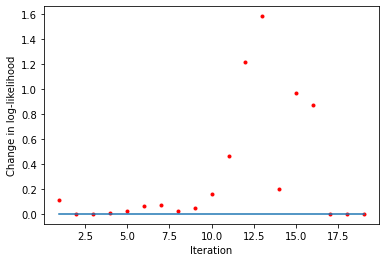

In [17]:
liks1 = blm_fit.model.liks1

print('Log-likelihoods monotonic (movers):', np.min(np.diff(liks1)) >= 0)

x_axis = range(1, len(liks1))
plt.plot(x_axis, np.diff(liks1), '.', label='liks1', color='red')
plt.plot(x_axis, np.zeros(len(liks1) - 1))
plt.xlabel('Iteration')
plt.ylabel('Change in log-likelihood')

Log-likelihoods monotonic (stayers): True


Text(0, 0.5, 'Change in log-likelihood')

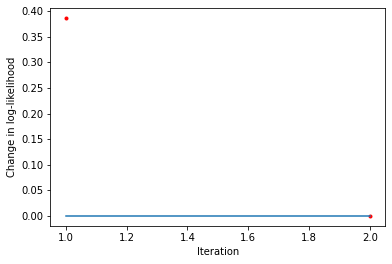

In [18]:
liks0 = blm_fit.model.liks0

print('Log-likelihoods monotonic (stayers):', np.min(np.diff(liks0)) >= 0)

x_axis = range(1, len(liks0))
plt.plot(x_axis, np.diff(liks0), '.', label='liks0', color='red')
plt.plot(x_axis, np.zeros(len(liks0) - 1))
plt.xlabel('Iteration')
plt.ylabel('Change in log-likelihood')

## Now we can investigate the results

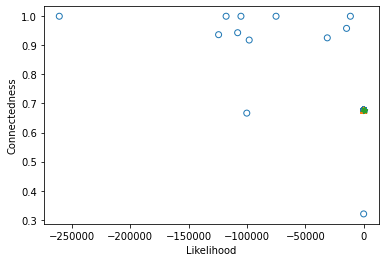

In [19]:
# Plot likelihood vs. connectedness
blm_fit.plot_liks_connectedness()

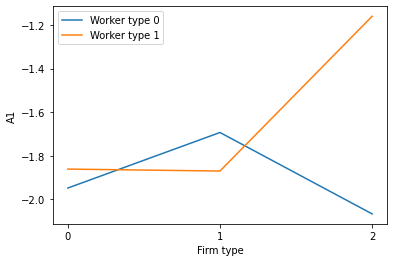

In [20]:
blm_fit.plot_A1()

## Finally, we can compare estimates to the truth

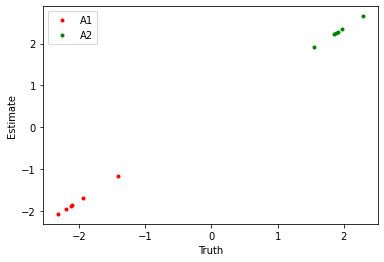

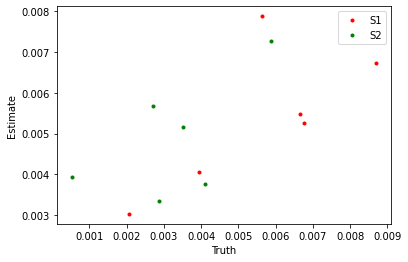

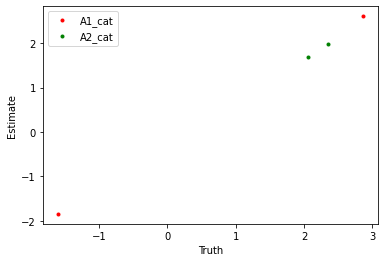

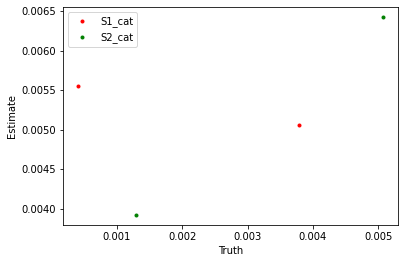

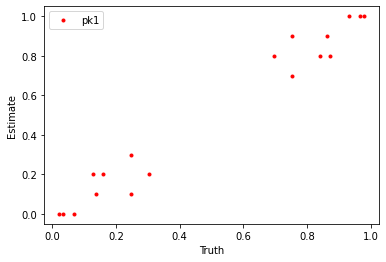

In [21]:
plt.plot(sim_params['A1'].flatten(), blm_fit.model.A1.flatten(), '.', label='A1', color='red')
plt.plot(sim_params['A2'].flatten(), blm_fit.model.A2.flatten(), '.', label='A2', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()

plt.plot(sim_params['S1'].flatten(), blm_fit.model.S1.flatten(), '.', label='S1', color='red')
plt.plot(sim_params['S2'].flatten(), blm_fit.model.S2.flatten(), '.', label='S2', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()

plt.plot(sim_params['A1_cat']['cat_tv_control'].flatten(), blm_fit.model.A1_cat['cat_tv_control'].flatten(), '.', label='A1_cat', color='red')
plt.plot(sim_params['A2_cat']['cat_tv_control'].flatten(), blm_fit.model.A2_cat['cat_tv_control'].flatten(), '.', label='A2_cat', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()

plt.plot(sim_params['S1_cat']['cat_tv_control'].flatten(), blm_fit.model.S1_cat['cat_tv_control'].flatten(), '.', label='S1_cat', color='red')
plt.plot(sim_params['S2_cat']['cat_tv_control'].flatten(), blm_fit.model.S2_cat['cat_tv_control'].flatten(), '.', label='S2_cat', color='green')
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()

plt.plot(sim_params['pk1'].flatten(), blm_fit.model.pk1.flatten(), '.', label='pk1', color='red')
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()

The parameters are identified only up to a constant intercept. If we take the sum over the estimators we see the model performs well.

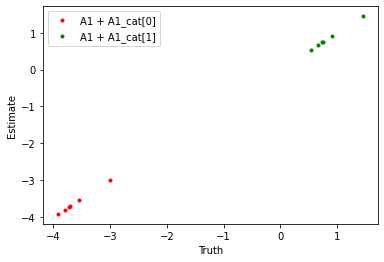

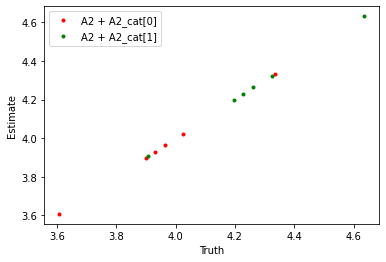

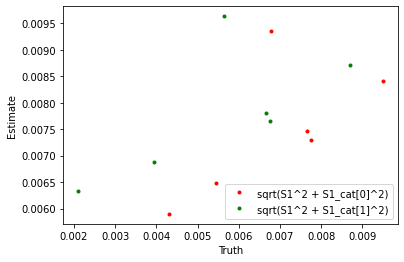

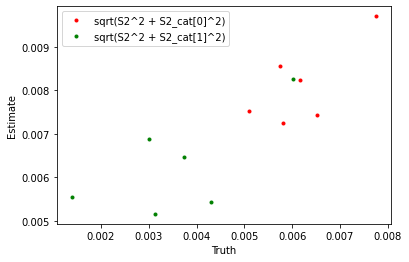

In [22]:
## A1 and A2 ##
plt.plot(
    (sim_params['A1'] + sim_params['A1_cat']['cat_tv_control'][0]).flatten(),
    (blm_fit.model.A1 + blm_fit.model.A1_cat['cat_tv_control'][0]).flatten(),
    '.', label='A1 + A1_cat[0]', color='red'
)
plt.plot(
    (sim_params['A1'] + sim_params['A1_cat']['cat_tv_control'][1]).flatten(),
    (blm_fit.model.A1 + blm_fit.model.A1_cat['cat_tv_control'][1]).flatten(),
    '.', label='A1 + A1_cat[1]', color='green'
)
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()

plt.plot(
    (sim_params['A2'] + sim_params['A2_cat']['cat_tv_control'][0]).flatten(),
    (blm_fit.model.A2 + blm_fit.model.A2_cat['cat_tv_control'][0]).flatten(),
    '.', label='A2 + A2_cat[0]', color='red'
)
plt.plot(
    (sim_params['A2'] + sim_params['A2_cat']['cat_tv_control'][1]).flatten(),
    (blm_fit.model.A2 + blm_fit.model.A2_cat['cat_tv_control'][1]).flatten(),
    '.', label='A2 + A2_cat[1]', color='green'
)
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()

## S1 and S2 ##
plt.plot(
    np.sqrt((sim_params['S1'] ** 2 + sim_params['S1_cat']['cat_tv_control'][0] ** 2).flatten()),
    np.sqrt((blm_fit.model.S1 ** 2 + blm_fit.model.S1_cat['cat_tv_control'][0] ** 2).flatten()),
    '.', label='sqrt(S1^2 + S1_cat[0]^2)', color='red'
)
plt.plot(
    np.sqrt((sim_params['S1'] ** 2 + sim_params['S1_cat']['cat_tv_control'][1] ** 2).flatten()),
    np.sqrt((blm_fit.model.S1 ** 2 + blm_fit.model.S1_cat['cat_tv_control'][1] ** 2).flatten()),
    '.', label='sqrt(S1^2 + S1_cat[1]^2)', color='green'
)
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()

plt.plot(
    np.sqrt((sim_params['S2'] ** 2 + sim_params['S2_cat']['cat_tv_control'][0] ** 2).flatten()),
    np.sqrt((blm_fit.model.S2 ** 2 + blm_fit.model.S2_cat['cat_tv_control'][0] ** 2).flatten()),
    '.', label='sqrt(S2^2 + S2_cat[0]^2)', color='red'
)
plt.plot(
    np.sqrt((sim_params['S2'] ** 2 + sim_params['S2_cat']['cat_tv_control'][1] ** 2).flatten()),
    np.sqrt((blm_fit.model.S2 ** 2 + blm_fit.model.S2_cat['cat_tv_control'][1] ** 2).flatten()),
    '.', label='sqrt(S2^2 + S2_cat[1]^2)', color='green'
)
plt.xlabel('Truth')
plt.ylabel('Estimate')
plt.legend()
plt.show()